**1. Global land and ocean temperature anomalies from 1880-2022**


a. Importing and uploading data file

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

In [ ]:
uploaded = files.upload()
tempdata = pd.read_csv(io.BytesIO(uploaded["Global land and ocean temperature anomalies.csv"]), skiprows = 4, na_values = "***")

Saving Global land and ocean temperature anomalies.csv to Global land and ocean temperature anomalies (1).csv


In [ ]:
print(tempdata)

        Year  Value
0     188001  -0.05
1     188002  -0.14
2     188003  -0.08
3     188004  -0.04
4     188005  -0.09
...      ...    ...
1705  202202   0.80
1706  202203   0.93
1707  202204   0.85
1708  202205   0.77
1709  202206   0.87

[1710 rows x 2 columns]


b. Line graphs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

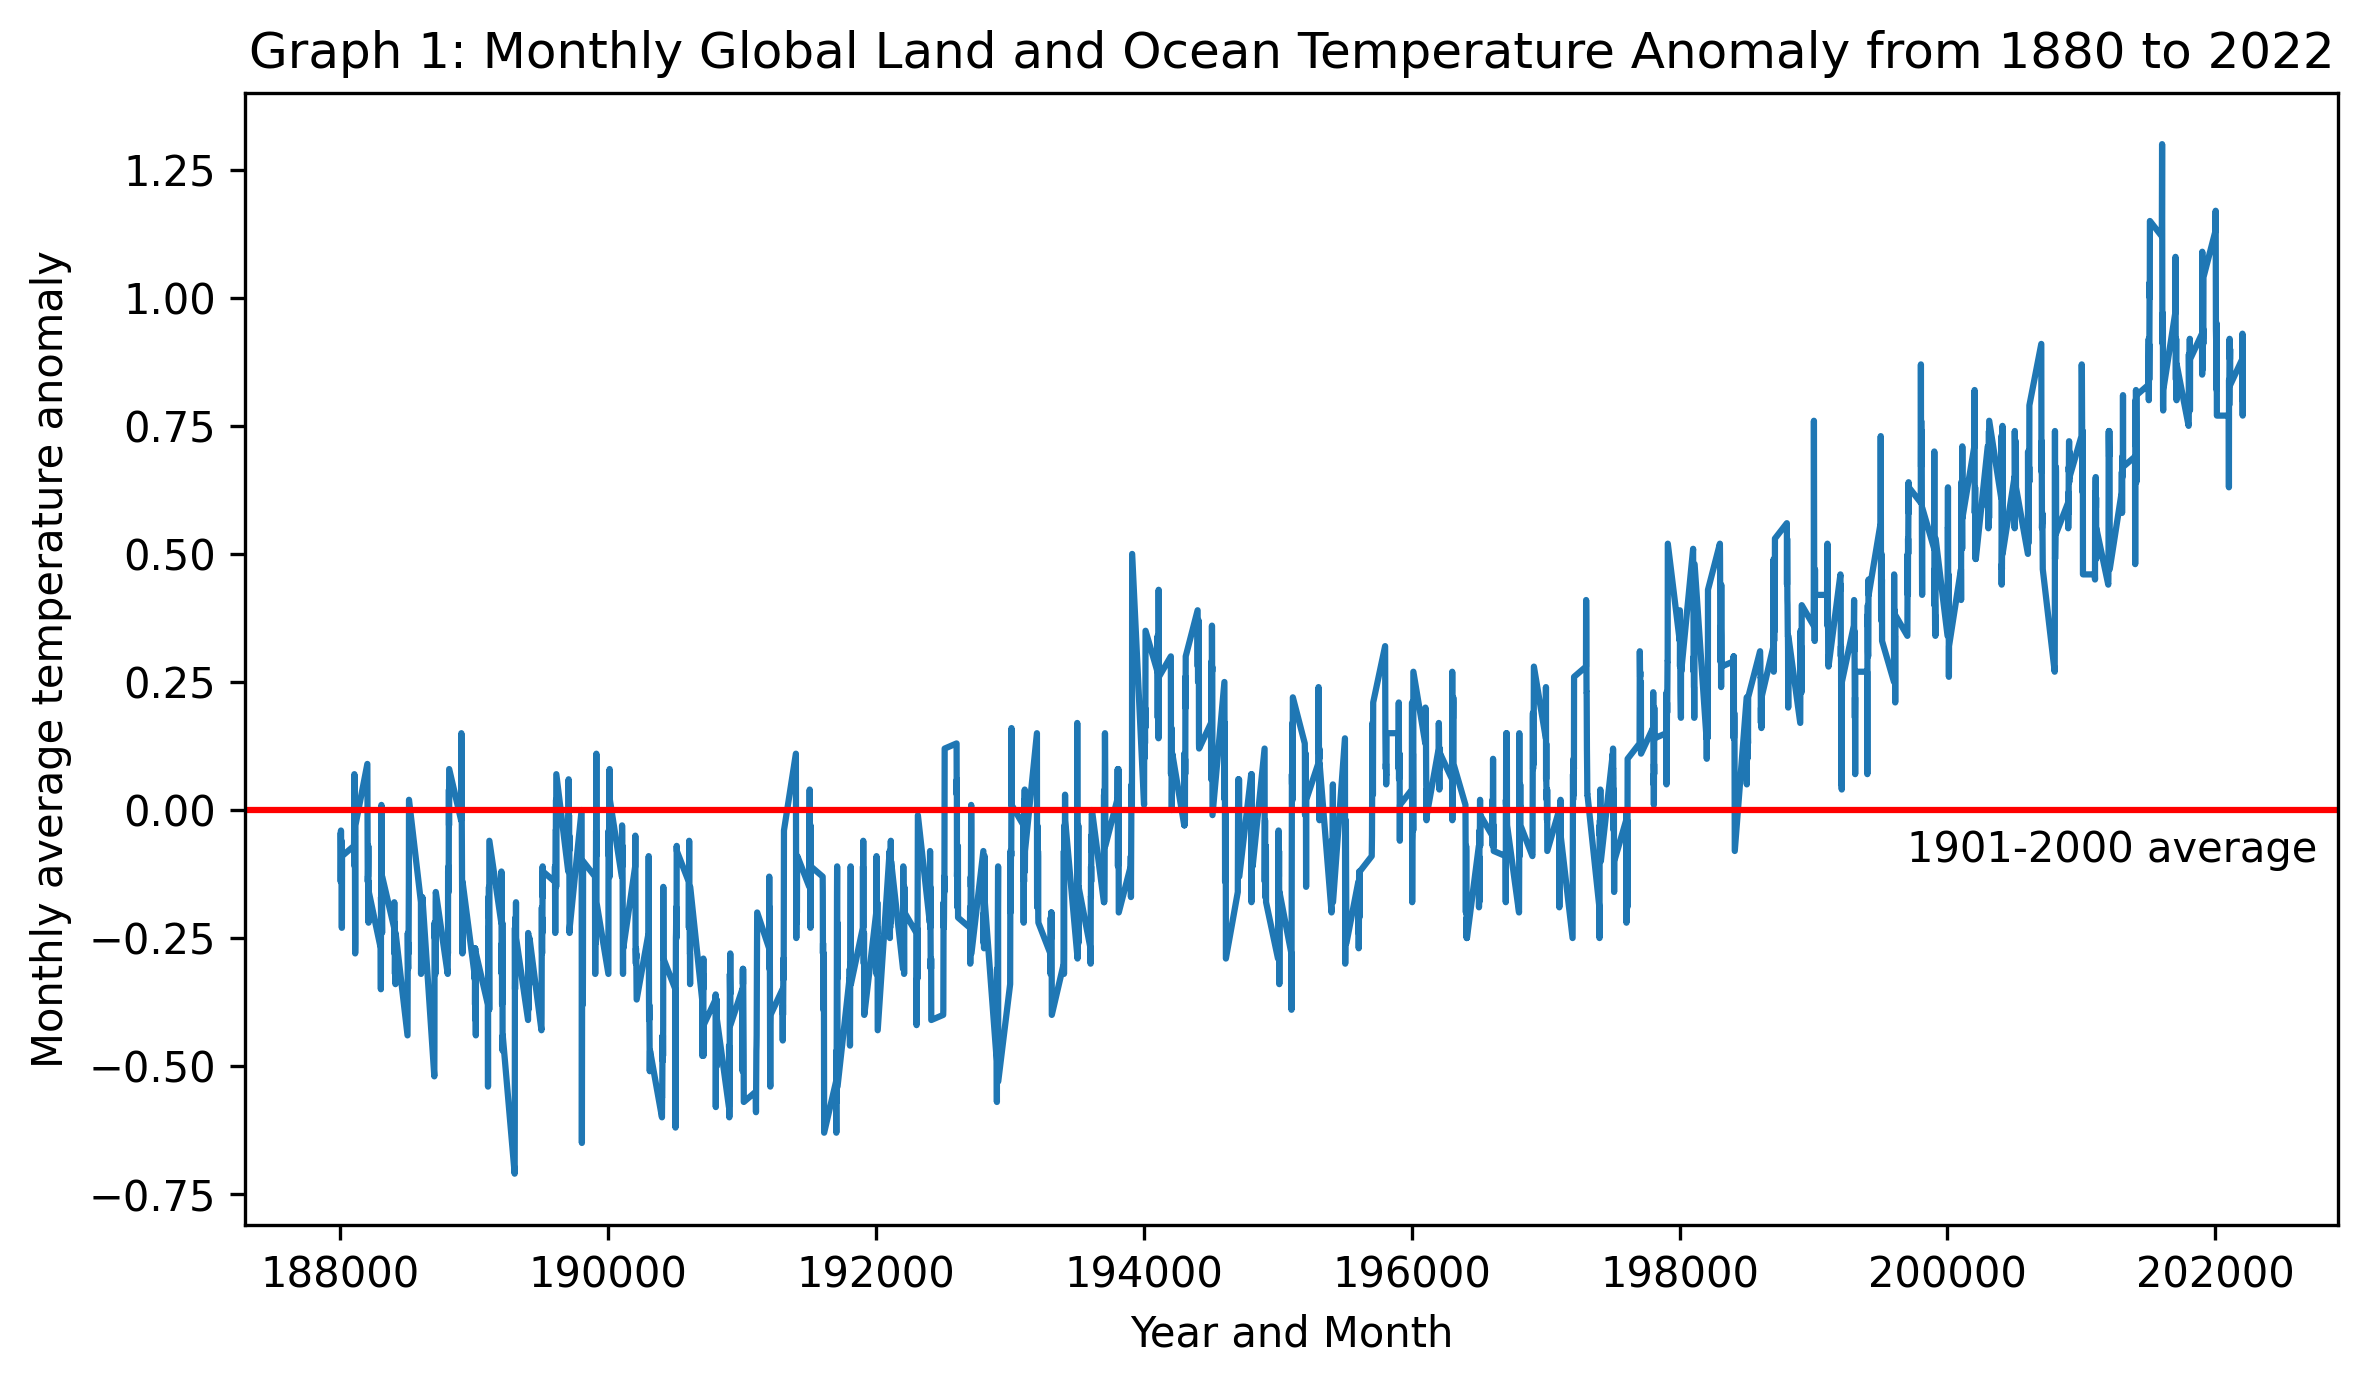

In [ ]:
# Creating monthly line graph
plt.figure(dpi=300, figsize=(9,5))
plt.plot(tempdata["Year"], tempdata["Value"])
plt.xlabel("Year and Month")
plt.ylabel("Monthly average temperature anomaly")
plt.axhline(y=0, color="r")
plt.text(199700, -0.1, "1901-2000 average") 
plt.title("Graph 1: Monthly Global Land and Ocean Temperature Anomaly from 1880 to 2022")
plt.savefig('Graph1_Monthly_Temperature_Anomaly.png', dpi=300) 
files.download('Graph1_Monthly_Temperature_Anomaly.png')

In [ ]:
# Group data into separated months
tempdataJan = tempdata[tempdata['Year'].apply(str).str.endswith('01')]
tempdataFeb = tempdata[tempdata['Year'].apply(str).str.endswith('02')]
tempdataMar = tempdata[tempdata['Year'].apply(str).str.endswith('03')]
tempdataApr = tempdata[tempdata['Year'].apply(str).str.endswith('04')]
tempdataMay = tempdata[tempdata['Year'].apply(str).str.endswith('05')]
tempdataJun = tempdata[tempdata['Year'].apply(str).str.endswith('06')]
tempdataJul = tempdata[tempdata['Year'].apply(str).str.endswith('07')]
tempdataAug = tempdata[tempdata['Year'].apply(str).str.endswith('08')]
tempdataSep = tempdata[tempdata['Year'].apply(str).str.endswith('09')]
tempdataOct = tempdata[tempdata['Year'].apply(str).str.endswith('10')]
tempdataNov = tempdata[tempdata['Year'].apply(str).str.endswith('11')]
tempdataDec = tempdata[tempdata['Year'].apply(str).str.endswith('12')]

In [ ]:
# Group data into separated seasons 
tempdata_spring = pd.concat([tempdataMar, tempdataApr, tempdataMay]).sort_values(by='Year', ascending=True)

tempdata_summer = pd.concat([tempdataJun, tempdataJul, tempdataAug]).sort_values(by='Year', ascending=True)

tempdata_fall = pd.concat([tempdataSep, tempdataOct, tempdataNov]).sort_values(by='Year', ascending=True)

tempdata_winter = pd.concat([tempdataDec, tempdataJan, tempdataFeb]).sort_values(by='Year', ascending=True)


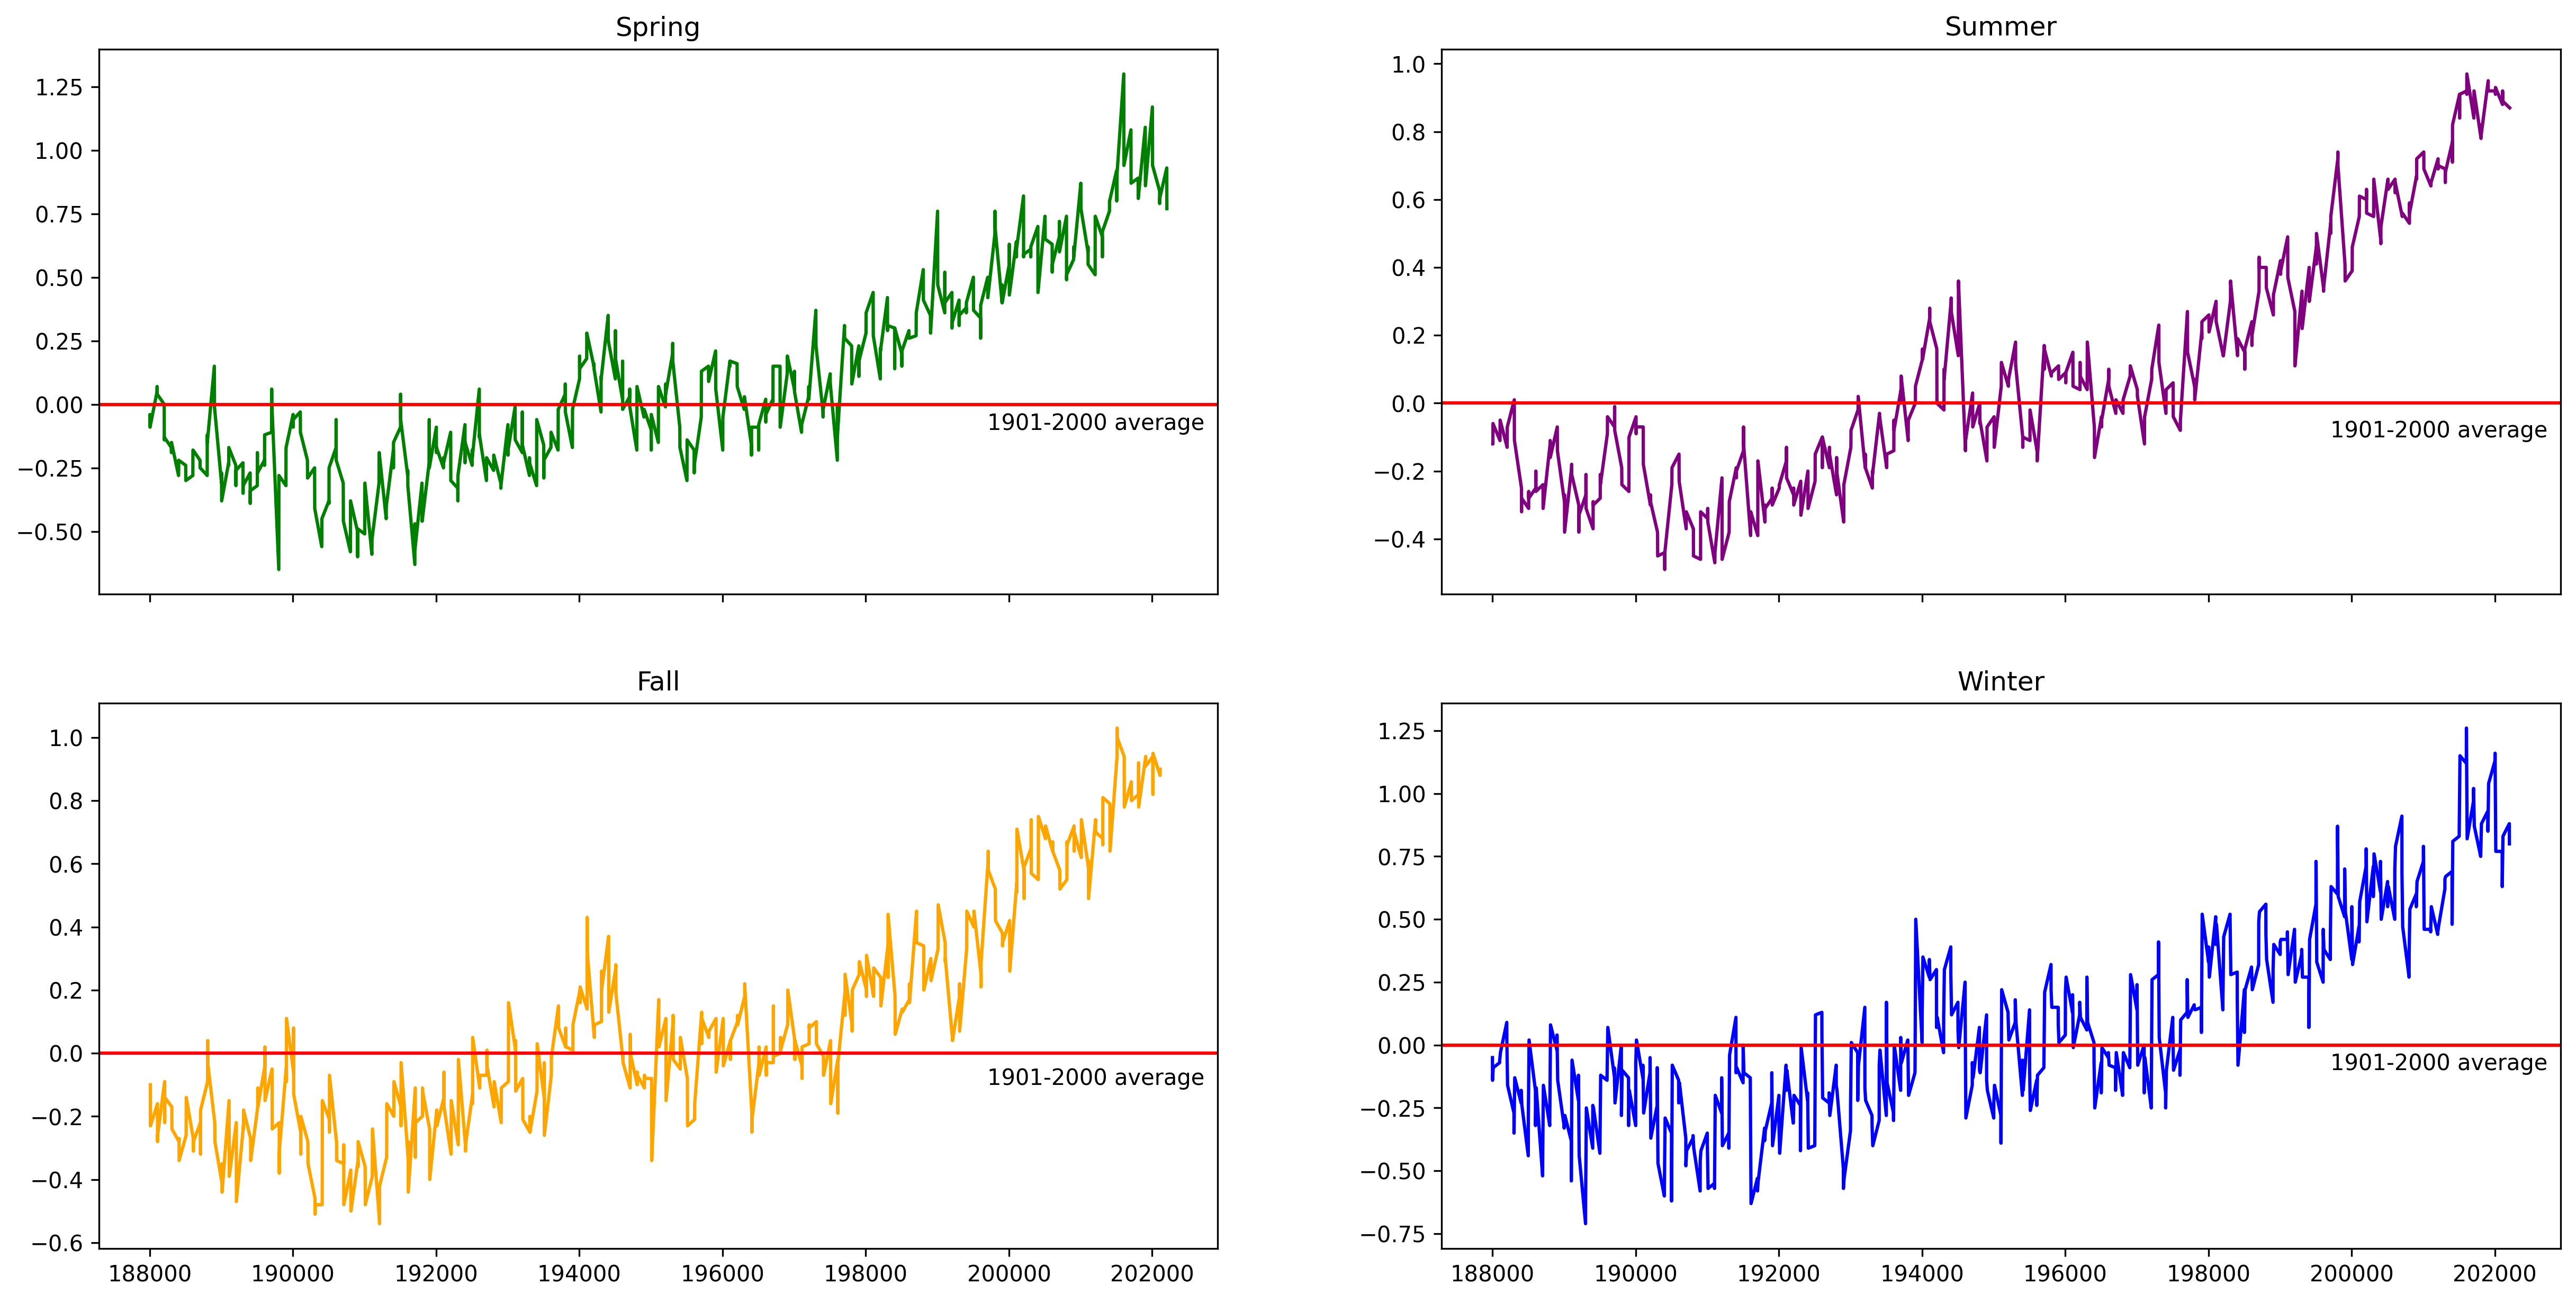

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
# Creating seasonal line graphs 

fig,axarr = plt.subplots(2,2, dpi=300, sharex=True, figsize=(20,10))
axarr[0,0].plot(tempdata_spring['Year'], tempdata_spring['Value'], c='green')
axarr[0,0].axhline(y=0, color="r")
axarr[0,0].text(199700, -0.1, "1901-2000 average")
axarr[0,0].set_title ('Spring')

axarr[0,1].plot(tempdata_summer['Year'], tempdata_summer['Value'], c='purple')
axarr[0,1].axhline(y=0, color="r")
axarr[0,1].text(199700, -0.1, "1901-2000 average")
axarr[0,1].set_title ('Summer')

axarr[1,0].plot(tempdata_fall['Year'], tempdata_fall['Value'], c='orange')
axarr[1,0].axhline(y=0, color="r")
axarr[1,0].text(199700, -0.1, "1901-2000 average")
axarr[1,0].set_title ('Fall')

axarr[1,1].plot(tempdata_winter['Year'], tempdata_winter['Value'], c='blue')
axarr[1,1].axhline(y=0, color="r")
axarr[1,1].text(199700, -0.1, "1901-2000 average")
axarr[1,1].set_title ('Winter')

plt.show()
plt.savefig('Graph2_Seasonal_Temperature_Anomaly.png', dpi=300) 
files.download('Graph2_Seasonal_Temperature_Anomaly.png')

c. Column charts

In [ ]:
# Summer in period 1940-1980 and in period 1981-2021
tempdata_summer_1940_1980 = tempdata_summer[(tempdata_summer["Year"] >= 194000) & (tempdata_summer["Year"] < 198100)]
tempdata_summer_1940_1980_value = tempdata_summer_1940_1980['Value']

tempdata_summer_1981_2021 = tempdata_summer[(tempdata_summer["Year"] >= 198100) & (tempdata_summer["Year"] < 202200)]
tempdata_summer_1981_2021_value = tempdata_summer_1981_2021['Value']

# Calculating min and max for bins width in next step
print(tempdata_summer_1981_2021_value.min(), tempdata_summer_1981_2021_value.max())

0.1 0.97


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

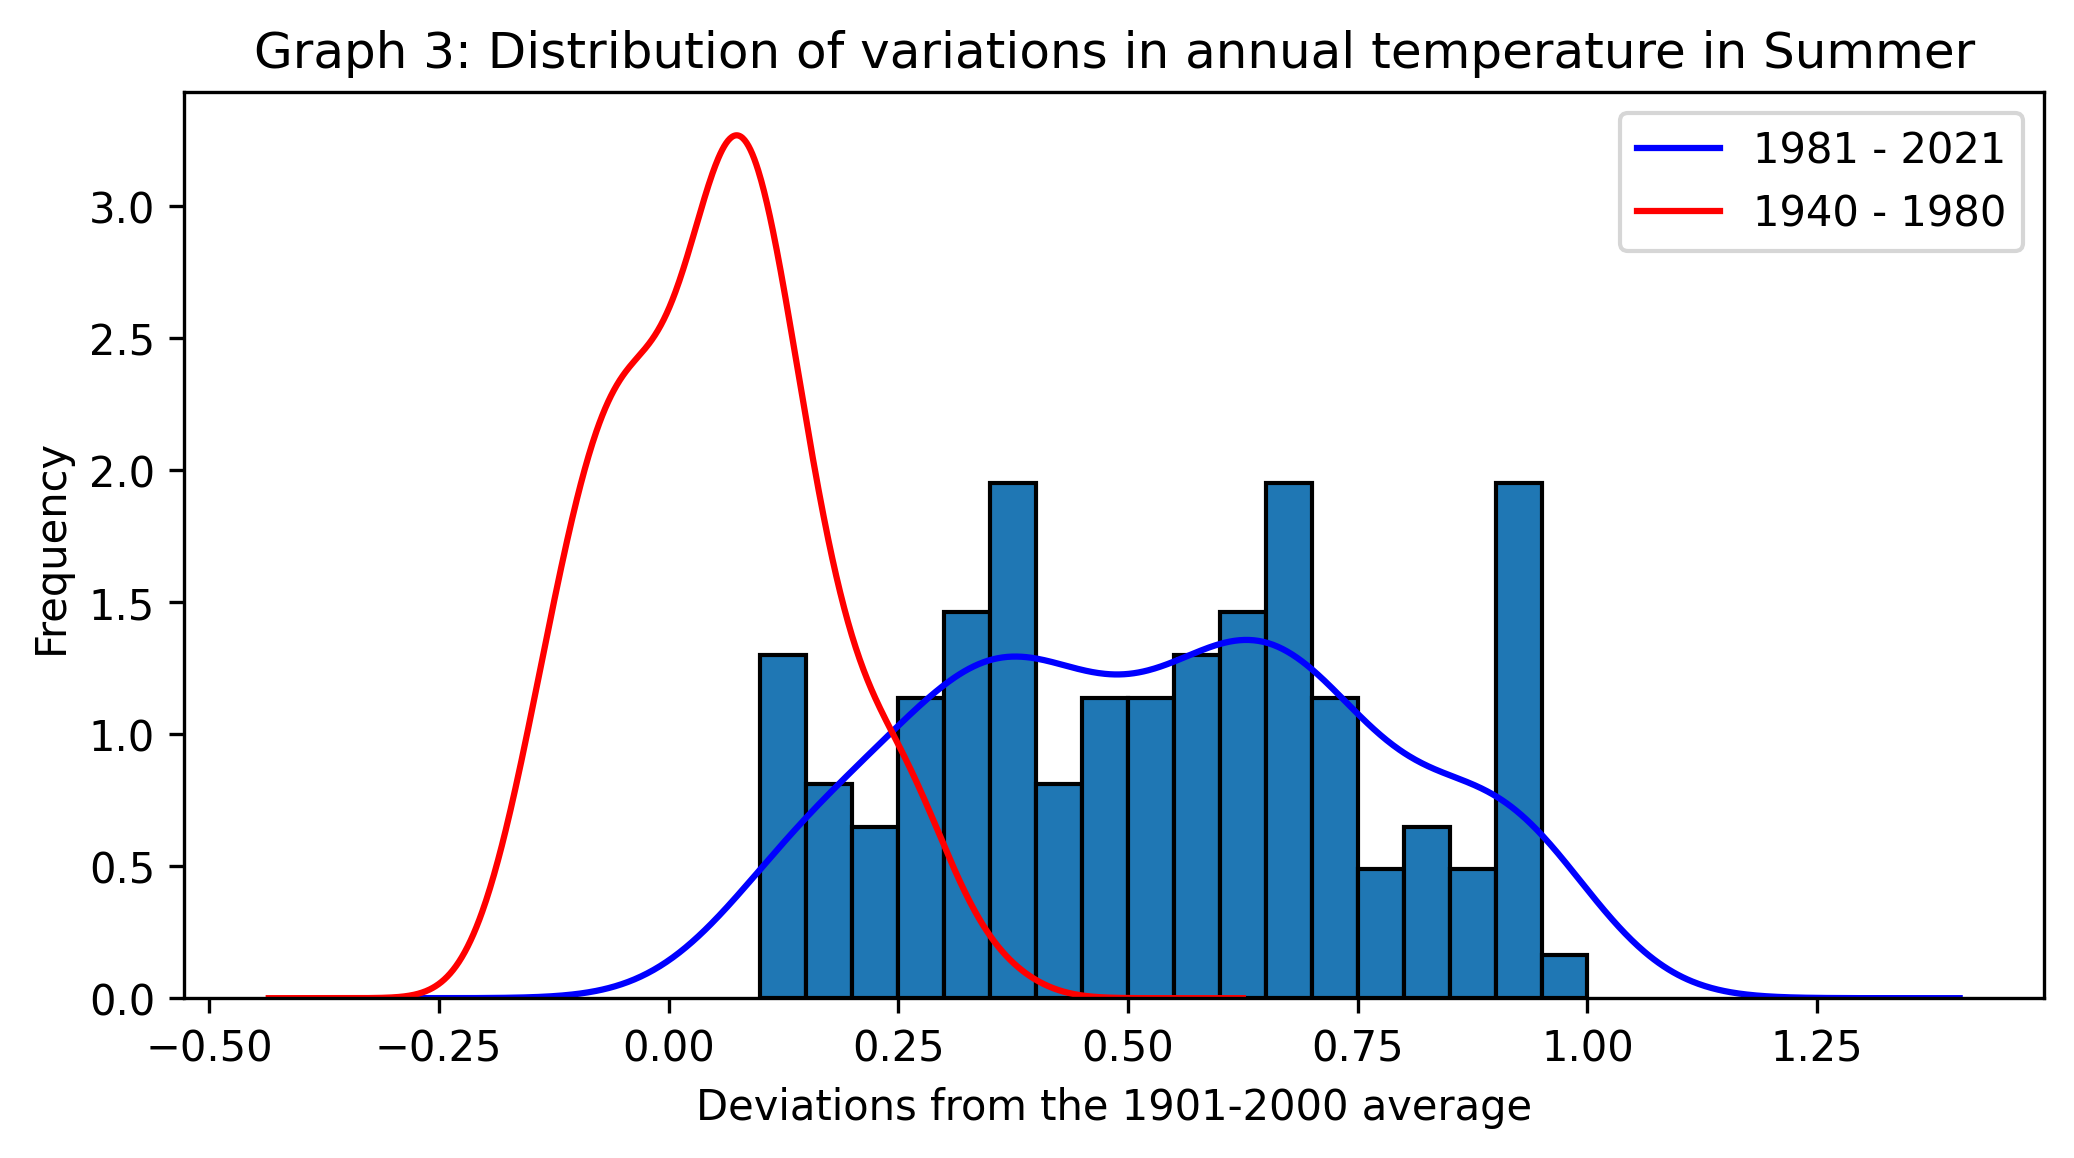

In [ ]:
plt.figure(dpi=300, figsize=(8,4))
tempdata_summer_1981_2021_value.hist(bins = np.arange(0.1, 1.02, 0.05), density = True, edgecolor = 'black') 
tempdata_summer_1981_2021_value.plot(kind = "density", label = "1981 - 2021", c='blue')
tempdata_summer_1940_1980_value.plot(kind = "density", label = "1940 - 1980", c='red')
plt.ylabel("Frequency")
plt.xlabel("Deviations from the 1901-2000 average")
plt.title("Graph 3: Distribution of variations in annual temperature in Summer")
plt.legend()
plt.savefig('Graph3_Summer_Distribution_of_variations.png', dpi=300) 
files.download('Graph3_Summer_Distribution_of_variations.png')

In [ ]:
#Fall in period 1940-1980 and in period 1981-2021
tempdata_fall_1940_1980 = tempdata_fall[(tempdata_fall["Year"] >= 194000) & (tempdata_fall["Year"] < 198100)]
tempdata_fall_1940_1980_value = tempdata_fall_1940_1980['Value']

tempdata_fall_1981_2021 = tempdata_fall[(tempdata_fall["Year"] >= 198100) & (tempdata_fall["Year"] < 202200)]
tempdata_fall_1981_2021_value = tempdata_fall_1981_2021['Value']

print(tempdata_fall_1981_2021_value.min(), tempdata_fall_1981_2021_value.max())

0.04 1.03


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

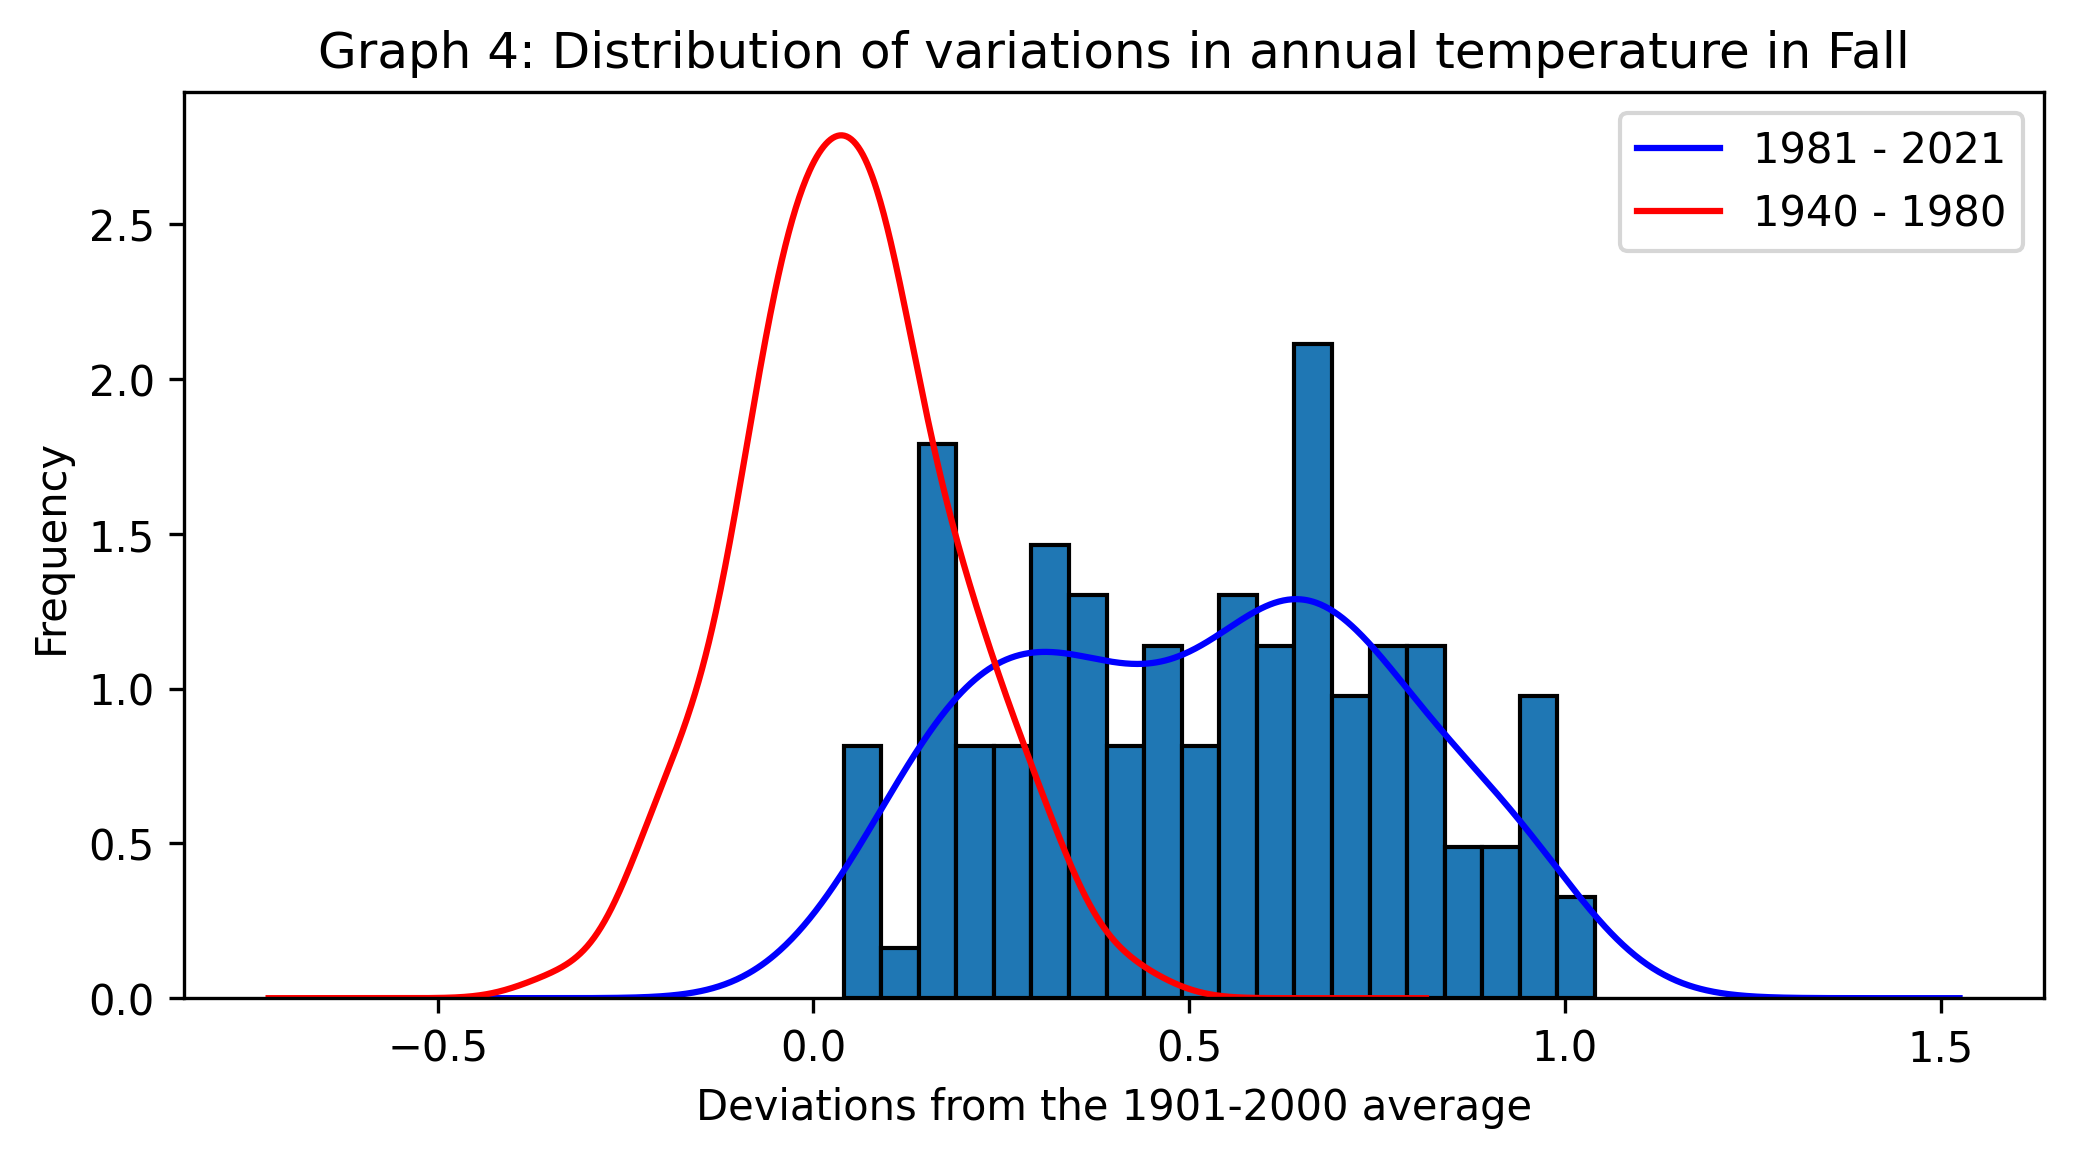

In [ ]:
plt.figure(dpi=300, figsize=(8,4))
tempdata_fall_1981_2021_value.hist(bins = np.arange(0.04, 1.08, 0.05), density = True, edgecolor = 'black') 
tempdata_fall_1981_2021_value.plot(kind = "density", label = "1981 - 2021", c='blue')
tempdata_fall_1940_1980_value.plot(kind = "density", label = "1940 - 1980", c='red')
plt.ylabel("Frequency")
plt.xlabel("Deviations from the 1901-2000 average")
plt.title("Graph 4: Distribution of variations in annual temperature in Fall")
plt.legend()
plt.savefig('Graph4_Fall_Distribution_of_Variations.png', dpi=300) 
files.download('Graph4_Fall_Distribution_of_Variations.png')

In [ ]:
#Spring data in period 1940-1980 and in period 1981-2021
tempdata_spring_1940_1980 = tempdata_spring[(tempdata_spring["Year"] >= 194000) & (tempdata_spring["Year"] < 198100)]
tempdata_spring_1940_1980_value = tempdata_spring_1940_1980['Value']

tempdata_spring_1981_2021 = tempdata_spring[(tempdata_spring["Year"] >= 198100) & (tempdata_spring["Year"] < 202200)]
tempdata_spring_1981_2021_value = tempdata_spring_1981_2021['Value']

print(tempdata_spring_1981_2021_value.min(), tempdata_spring_1981_2021_value.max())

0.1 1.3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

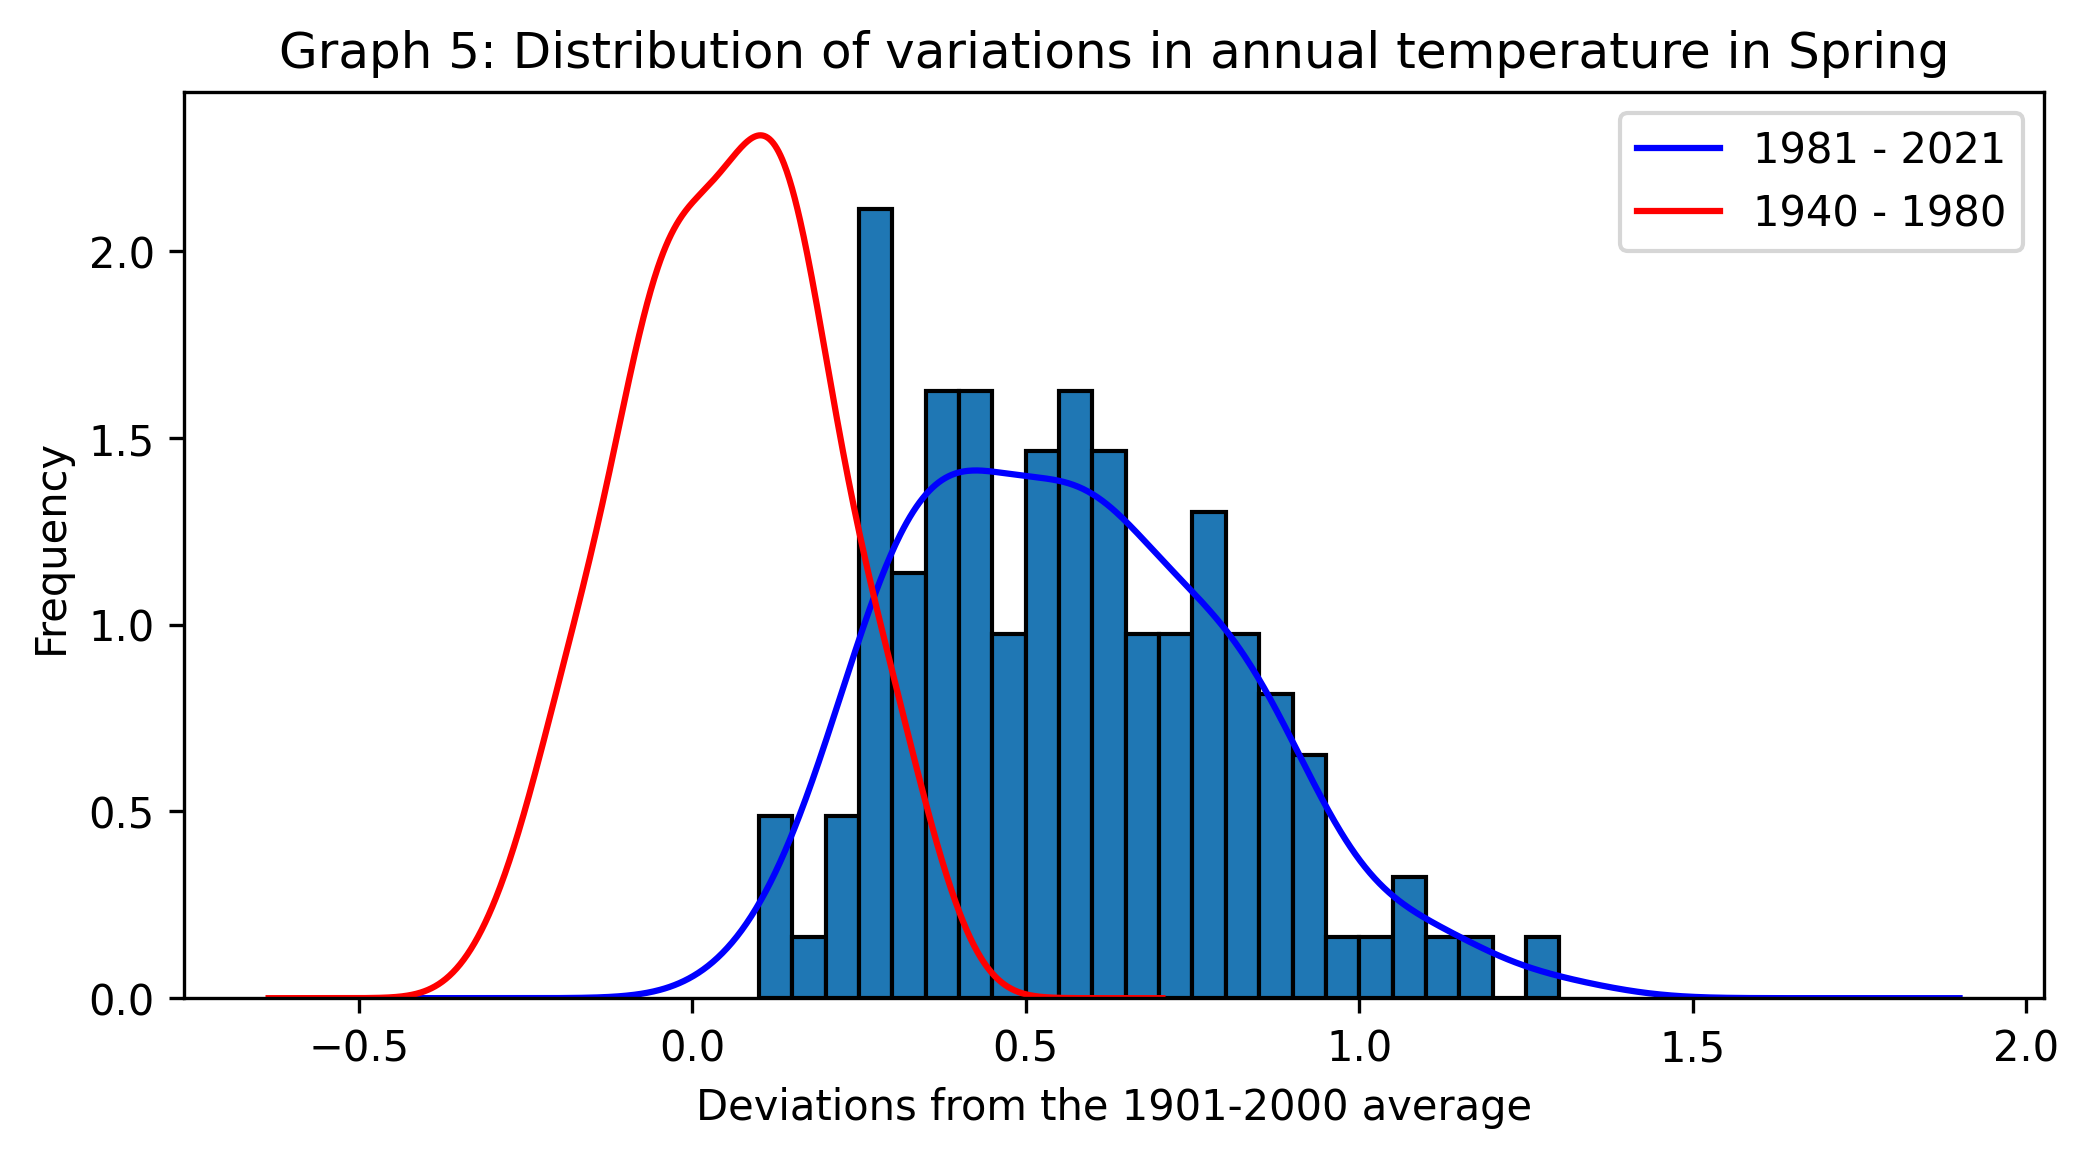

In [ ]:
# Creating column chart for Spring
plt.figure(dpi=300, figsize=(8,4))
tempdata_spring_1981_2021_value.hist(bins = np.arange(0.1, 1.35, 0.05), density = True, edgecolor = 'black') 
tempdata_spring_1981_2021_value.plot(kind = "density", label = "1981 - 2021", c='blue')
tempdata_spring_1940_1980_value.plot(kind = "density", label = "1940 - 1980", c='red')
plt.ylabel("Frequency")
plt.xlabel("Deviations from the 1901-2000 average")
plt.title("Graph 5: Distribution of variations in annual temperature in Spring")
plt.legend()
plt.savefig('Graph5_Spring_Distribution_of_variations.png', dpi=300) 
files.download('Graph5_Spring_Distribution_of_variations.png')

In [ ]:
#Winter in period 1940-1980 and in period 1981-2021
tempdata_winter_1940_1980 = tempdata_winter[(tempdata_winter["Year"] >= 194000) & (tempdata_winter["Year"] < 198100)]
tempdata_winter_1940_1980_value = tempdata_winter_1940_1980['Value']

tempdata_winter_1981_2021 = tempdata_winter[(tempdata_winter["Year"] >= 198100) & (tempdata_winter["Year"] < 202200)]
tempdata_winter_1981_2021_value = tempdata_winter_1981_2021['Value']

print(tempdata_winter_1981_2021_value.min(), tempdata_winter_1981_2021_value.max())

-0.08 1.26


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

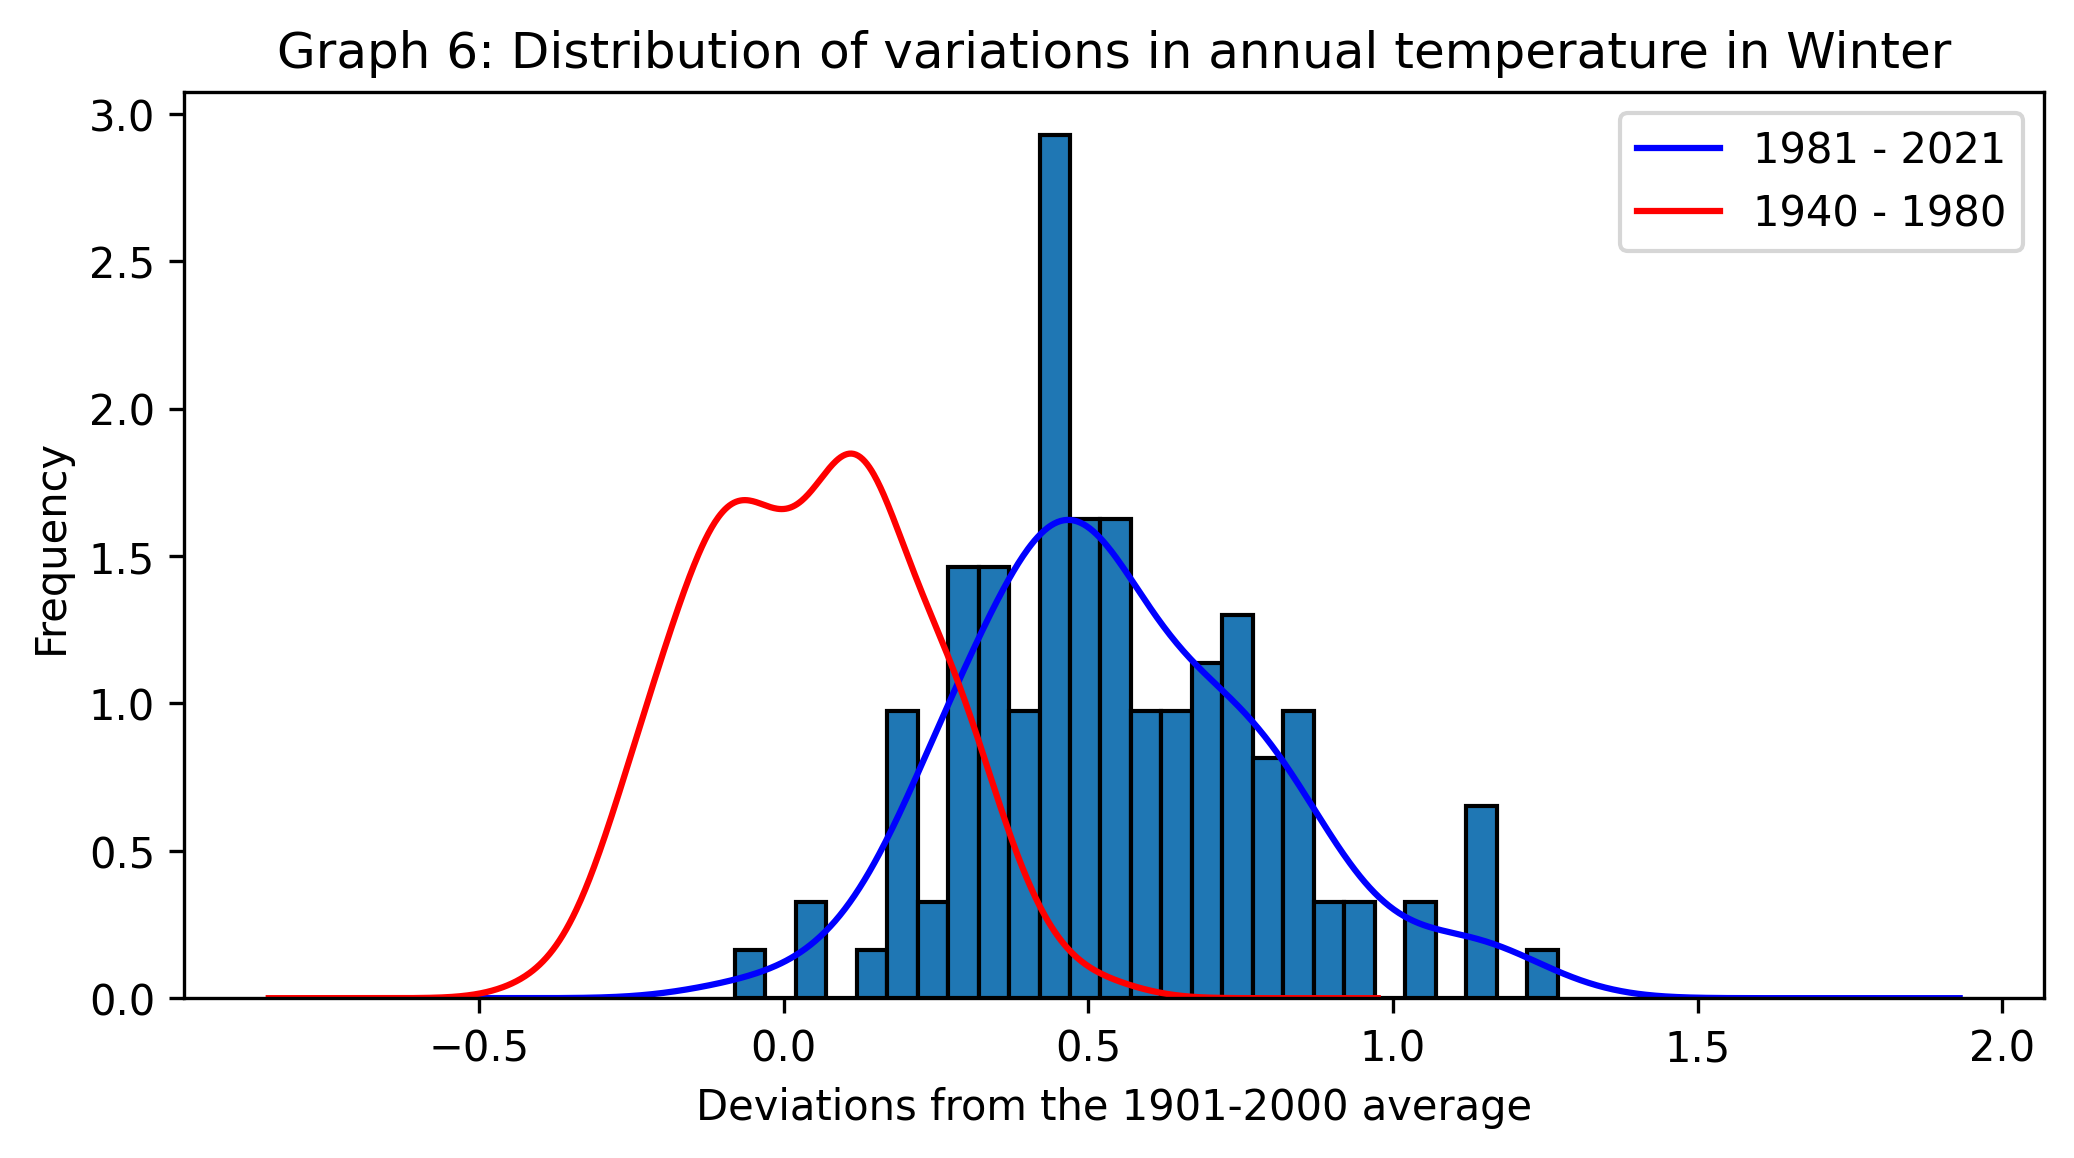

In [ ]:
plt.figure(dpi=300, figsize=(8,4))
tempdata_winter_1981_2021_value.hist(bins = np.arange(-0.08, 1.31, 0.05), density = True, edgecolor = 'black') 
tempdata_winter_1981_2021_value.plot(kind = "density", label = "1981 - 2021", c='blue')
tempdata_winter_1940_1980_value.plot(kind = "density", label = "1940 - 1980", c='red')
plt.ylabel("Frequency")
plt.xlabel("Deviations from the 1901-2000 average")
plt.title("Graph 6: Distribution of variations in annual temperature in Winter")
plt.legend()
plt.savefig('Graph6_Winter_Distribution_of_Variations.png', dpi=300) 
files.download('Graph6_Winter_Distribution_of_Variations.png')